# EPS 109 "Computer Simulations in Earth and Planetary Science"
### Final Project | Erosion of a Staircase
### Instructor: Burkhard Militzer
### Student: Craig Spengler | 3036865141

# ---------------------------------------------------------------------------------------------------------------

### Import statements.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.animation as animation

### Create a staircase containing 10 steps total.

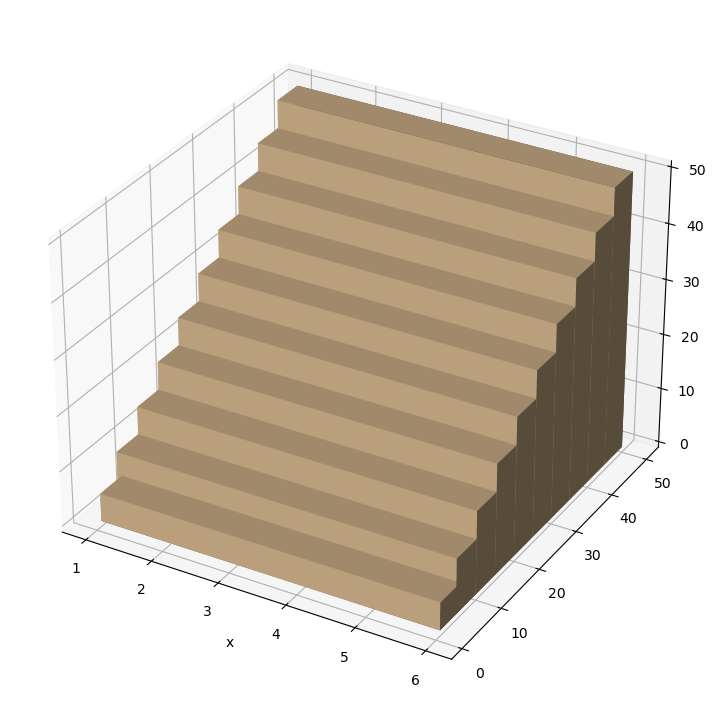

In [2]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

x = np.ones(10)
y = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z = np.zeros(10)

dx = np.ones(10) * 5
dy = np.ones(10) * 5
dz = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

ax.bar3d(x, y, z, dx, dy, dz, color = 'tan')
ax.set_xlabel('x')

plt.show()

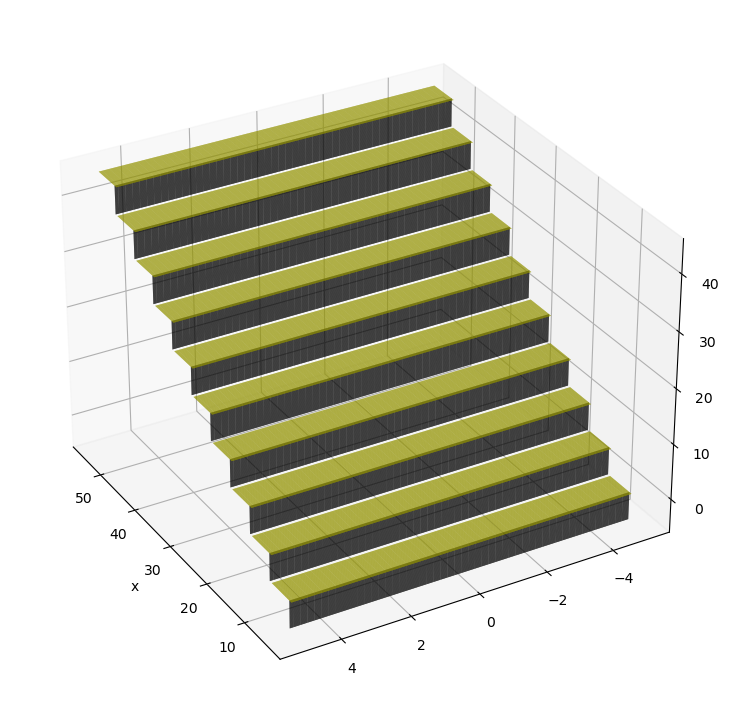

In [3]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a meshgrid for y and z
y2 = np.linspace(-5, 5, 100)
z2 = np.linspace(-5, 0, 100)
Y2, Z2 = np.meshgrid(y2, z2)

for i in range(10):
    # Define Z.
    Z = np.full_like(X, i*5)

    # Plot the vertical face.
    ax.plot_surface(X/2 + 5*i + 7, Y, Z, color='y')

    X2 = np.full_like(Y2, (i+1)*5)

    # Plot the second plane
    ax.plot_surface(X2, Y2, Z2+i*5, color='k')
    
    
ax.view_init(azim=150)
ax.set_xlabel('x')
plt.show()

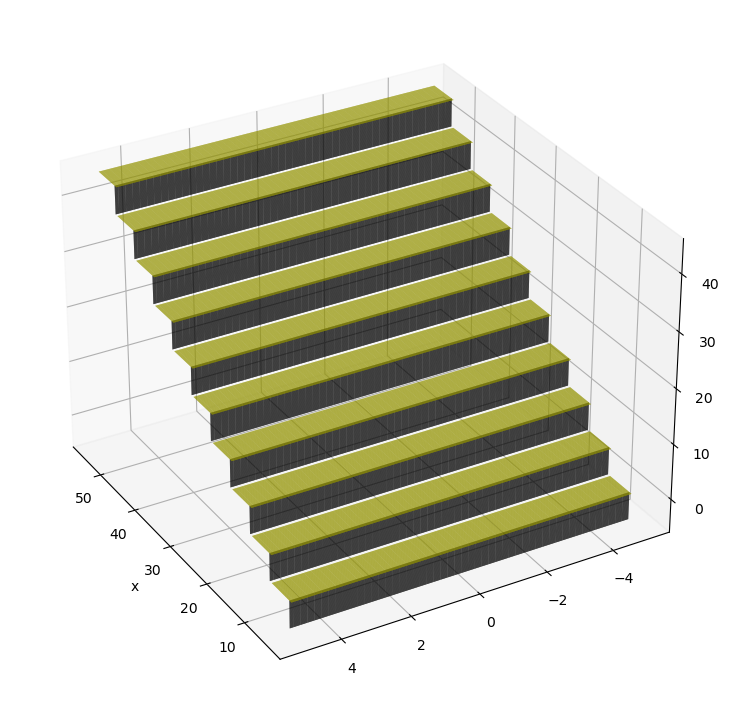

In [4]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a meshgrid for y and z
y2 = np.linspace(-5, 5, 100)
z2 = np.linspace(-5, 0, 100)
Y2, Z2 = np.meshgrid(y2, z2)



for i in range(10):
    # Define Z.
    Z = np.full_like(X, i*5)

    # Plot the horozontal face.
    ax.plot_surface(X/2 + 5*i + 7, Y, Z, color='y')

    X2 = np.full_like(Y2, (i+1)*5)

    # Plot the vertical face.
    ax.plot_surface(X2, Y2, Z2+i*5, color='k')
    
    
ax.view_init(azim=150)
ax.set_xlabel('x')
plt.show()

### Function to generate intial foot selection.

In [5]:
def footSelect():
    
    initFootSelect = random.random()
    
    # Around 10% - 15% of people are left dominant.
    if initFootSelect <= 0.15:
        foot = 1   # Left Foot.
    else:
        foot = 0   # Right Foot.
        
    return(foot)

### Plot the simulation of erosion.

In [ ]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a meshgrid for y and z
y2 = np.linspace(-5, 5, 100)
z2 = np.linspace(-5, 0, 100)
Y2, Z2 = np.meshgrid(y2, z2)


# Assign left and right foot arrays the value of the y.
left = right = y


# Number of times a person traverses up the stairs.
numOfIterations = 100

# Amount of erosion each time a step is walked on.
erosionRate = 0.25



# Model the erosion.
for _ in range(numOfIterations):
    
    # Choose a foot to start with when walking up the staircase. [Right 85% or Left 15%]
    footSelection = footSelect()
    
        # Left foot first.
    if footSelection == 1:
        
        left[55:65] -= erosionRate

        for i in range (len(left)):
            if left[i] < -5:
                left[i] = -5

        X, leftY = np.meshgrid(x, left)
               
        for i in range(10):
            # Define Z.
            Z = np.full_like(X, i*5) 

            # Plot the horozontal face.
            ax.plot_surface(X/2 + 5*i + 7, leftY, Z, color='y')

            X2 = np.full_like(Y2, (i+1)*5)

            # Plot the vertical face.
            ax.plot_surface(X2, Y2, Z2 + i*5, color='k')
            
            

    # Right foot first.    
    else:
        
        right[80:90] -= erosionRate

        for i in range (len(right)):
            if right[i] < -5:
                right[i] = -5
                
        X, rightY = np.meshgrid(x, right)
        
        for i in range(10):
            # Define Z.
            Z = np.full_like(X, i*5)

            # Plot the horozontal face.
            ax.plot_surface(X/2 + 5*i + 7, rightY, Z, color='y')

            X2 = np.full_like(Y2, (i+1)*5)

            # Plot the vertical face.
            ax.plot_surface(X2, Y2, Z2+i*5, color='k')


    

ax.view_init(azim=150)
ax.set_xlabel('x')
plt.show()

In [ ]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a meshgrid for y and z
y2 = np.linspace(-5, 5, 100)
z2 = np.linspace(-5, 0, 100)
Y2, Z2 = np.meshgrid(y2, z2)


# Assign left and right foot arrays the value of the y.
left = right = y


# Number of times a person traverses up the stairs.
numOfIterations = 100

# Amount of erosion each time a step is walked on.
erosionRate = 0.25

def update(i):
    # Model the erosion.
    for _ in range(numOfIterations):

        # Choose a foot to start with when walking up the staircase. [Right 85% or Left 15%]
        footSelection = footSelect()

            # Left foot first.
        if footSelection == 1:

            left[55:65] -= erosionRate

            for i in range (len(left)):
                if left[i] < -5:
                    left[i] = -5

            X, leftY = np.meshgrid(x, left)

            for i in range(10):
                # Define Z.
                Z = np.full_like(X, i*5) 

                # Plot the horozontal face.
                ax.plot_surface(X/2 + 5*i + 7, leftY, Z, color='y')

                X2 = np.full_like(Y2, (i+1)*5)

                # Plot the vertical face.
                ax.plot_surface(X2, Y2, Z2 + i*5, color='k')



        # Right foot first.    
        else:

            right[80:90] -= erosionRate

            for i in range (len(right)):
                if right[i] < -5:
                    right[i] = -5

            X, rightY = np.meshgrid(x, right)

            for i in range(10):
                # Define Z.
                Z = np.full_like(X, i*5) 

                # Plot the horozontal face.
                ax.plot_surface(X/2 + 5*i + 7, rightY, Z, color='y')

                X2 = np.full_like(Y2, (i+1)*5)

                # Plot the vertical face.
                ax.plot_surface(X2, Y2, Z2+i*5, color='k')


    

    ax.view_init(azim=150)
    plt.draw()
    plt.pause(0.001)

ani = animation.FuncAnimation(fig, update, frames=range(10))

# Save the animation
ani.save('animation.mp4')

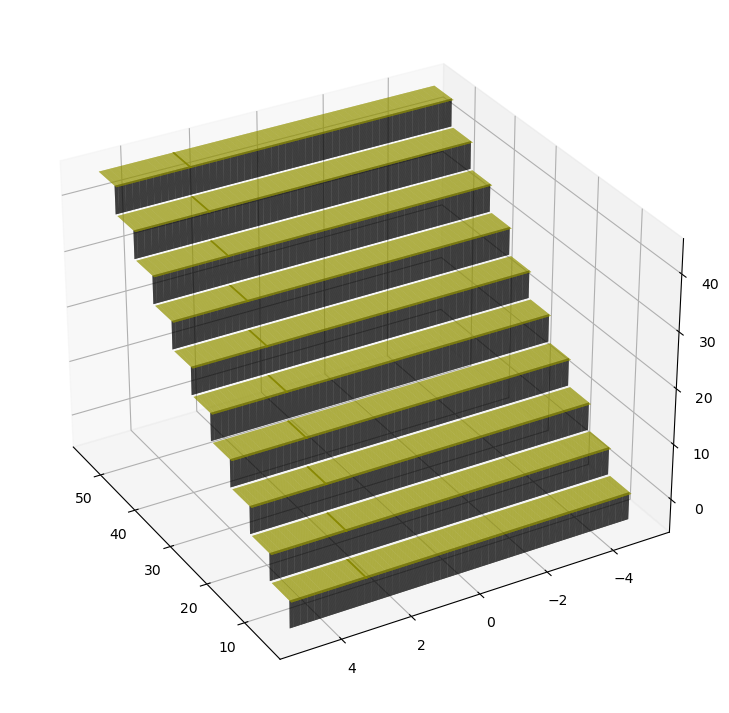

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a meshgrid for y and z
y2 = np.linspace(-5, 5, 100)
z2 = np.linspace(-5, 0, 100)
Y2, Z2 = np.meshgrid(y2, z2)


# Assign left and right foot arrays the value of the y.
left = right = y


# Number of times a person traverses up the stairs.
numOfIterations = 100

# Amount of erosion each time a step is walked on.
erosionRate = 0.25

def update(i):

    # Choose a foot to start with when walking up the staircase. [Right 85% or Left 15%]
    footSelection = footSelect()

        # Left foot first.
    if footSelection == 1:

        left[55:65] -= erosionRate

        for i in range (len(left)):
            if left[i] < -5:
                left[i] = -5

        X, leftY = np.meshgrid(x, left)

        for i in range(10):
            # Define Z.
            Z = np.full_like(X, i*5) 

            # Plot the horozontal face.
            ax.plot_surface(X/2 + 5*i + 7, leftY, Z, color='y')

            X2 = np.full_like(Y2, (i+1)*5)

            # Plot the vertical face.
            ax.plot_surface(X2, Y2, Z2 + i*5, color='k')



    # Right foot first.    
    else:

        right[80:90] -= erosionRate

        for i in range (len(right)):
            if right[i] < -5:
                right[i] = -5

        X, rightY = np.meshgrid(x, right)

        for i in range(10):
            # Define Z.
            Z = np.full_like(X, i*5) 

            # Plot the horozontal face.
            ax.plot_surface(X/2 + 5*i + 7, rightY, Z, color='y')

            X2 = np.full_like(Y2, (i+1)*5)

            # Plot the vertical face.
            ax.plot_surface(X2, Y2, Z2+i*5, color='k')


    

    ax.view_init(azim=150)
    plt.draw()
    plt.pause(0.001)

# Model the erosion.
#for _ in range(numOfIterations):
    
ani = animation.FuncAnimation(fig, update, frames=range(10))

# Save the animation
ani.save('animation.mp4')